<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/Spam_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Liberary**

In [1]:
# Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split

#process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb


#Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay






In [2]:

import kagglehub
path = kagglehub.dataset_download('abdallahwagih/spam-emails')

print('Data source import complete.')


Data source import complete.


In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-emails/spam.csv


# **EDA(Read Data)**

In [4]:
df =pd.read_csv("/kaggle/input/spam-emails/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.sample()

,Category,Message
1947,ham,Hey we can go jazz power yoga hip hop kb and y...


In [7]:
df.Category.value_counts()

,count
Category,
ham,4825
spam,747


# **Preprocessng**

In [8]:
# create new column spam
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)         # Encodingggg

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [10]:
# CountVectorizer
v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59448 stored elements and shape (4457, 7744)>

In [11]:
#  TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **Process(Model)**

In [12]:
#GaussianNB  (change spare matrix to Array)              *------->          مع بيانات رقمية مستمرة (continuous features)
# change to array
X_train_arr = X_train_vec.toarray()
X_test_arr = X_test_vec.toarray()

#  GaussianNB model
model1 = GaussianNB()
model1.fit(X_train_arr, y_train)
y_pred = model1.predict(X_test_arr)

print(" Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Predictions:", y_pred)

 Accuracy: 90.04 %
Predictions: [0 0 0 ... 0 1 0]


In [13]:


# RandomForest model
model2 = RandomForestClassifier()
model2.fit(X_train_arr, y_train)
y_pred = model2.predict(X_test_arr)

print(" Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Predictions:", y_pred)

 Accuracy: 98.12 %
Predictions: [0 0 0 ... 0 1 0]


In [14]:
# SVM model
model3 = SVC()
model3.fit(X_train_arr, y_train)
y_pred = model3.predict(X_test_arr)

print(" Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Predictions:", y_pred)

 Accuracy: 98.39 %
Predictions: [0 0 0 ... 0 1 0]



 Logistic Regression
Accuracy: 97.22 %
classification report - Logistic Regression               precision    recall  f1-score   support

           0       0.97      1.00      0.98       963
           1       0.98      0.81      0.89       152

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



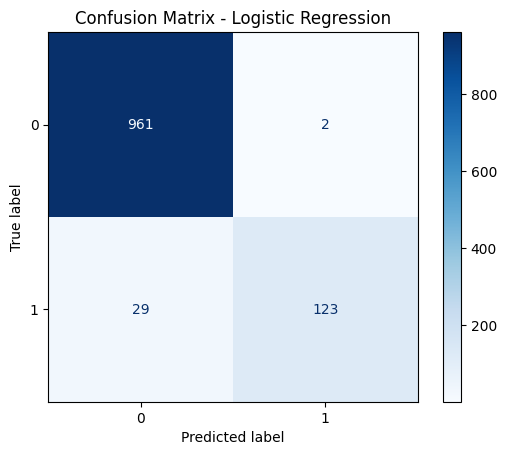


 KNN
Accuracy: 90.76 %
classification report - KNN               precision    recall  f1-score   support

           0       0.90      1.00      0.95       963
           1       1.00      0.32      0.49       152

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.72      1115
weighted avg       0.92      0.91      0.89      1115



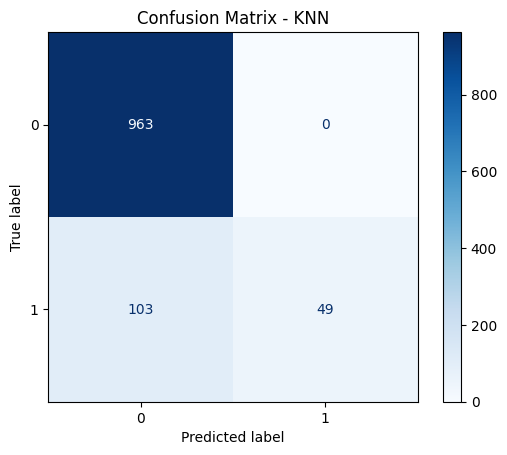


 Decision Tree
Accuracy: 96.05 %
classification report - Decision Tree               precision    recall  f1-score   support

           0       0.97      0.98      0.98       963
           1       0.89      0.82      0.85       152

    accuracy                           0.96      1115
   macro avg       0.93      0.90      0.91      1115
weighted avg       0.96      0.96      0.96      1115



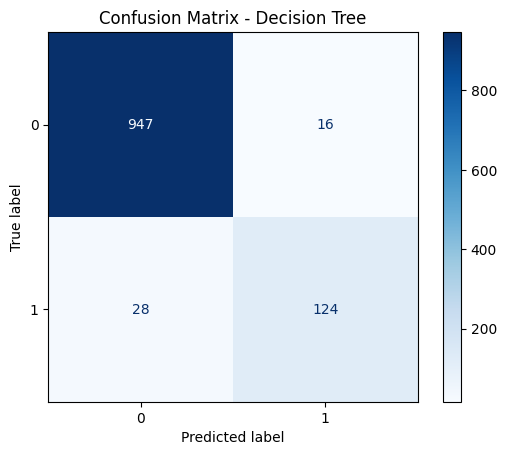


 XGBoost
Accuracy: 97.76 %
classification report - XGBoost               precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.86      0.91       152

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



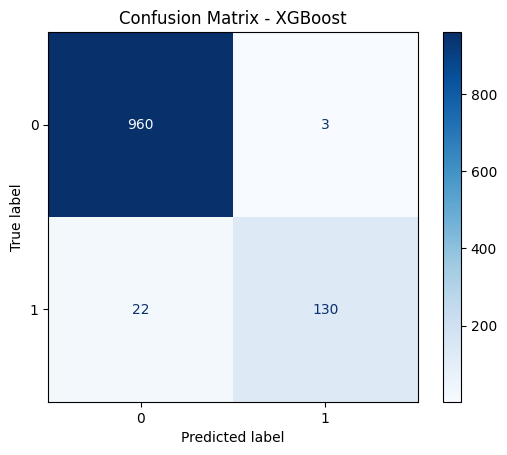

[LightGBM] [Info] Number of positive: 595, number of negative: 3862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13310
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 471
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133498 -> initscore=-1.870379
[LightGBM] [Info] Start training from score -1.870379

 LightGBM
Accuracy: 98.21 %
classification report - LightGBM               precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.97      0.89      0.93       152

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



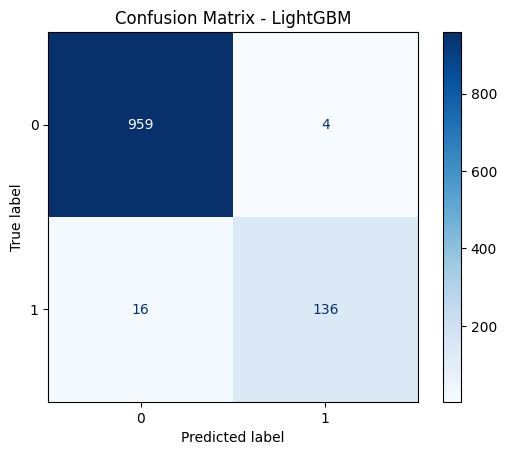


 AdaBoost
Accuracy: 94.8 %
classification report - AdaBoost               precision    recall  f1-score   support

           0       0.95      0.99      0.97       963
           1       0.95      0.65      0.77       152

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



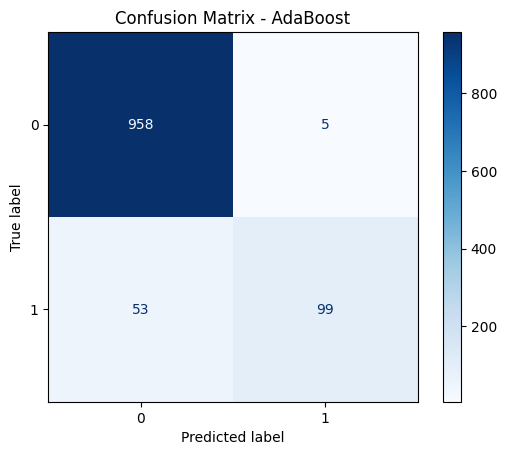


 Gradient Boosting
Accuracy: 97.22 %
classification report - Gradient Boosting               precision    recall  f1-score   support

           0       0.97      1.00      0.98       963
           1       0.99      0.80      0.89       152

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



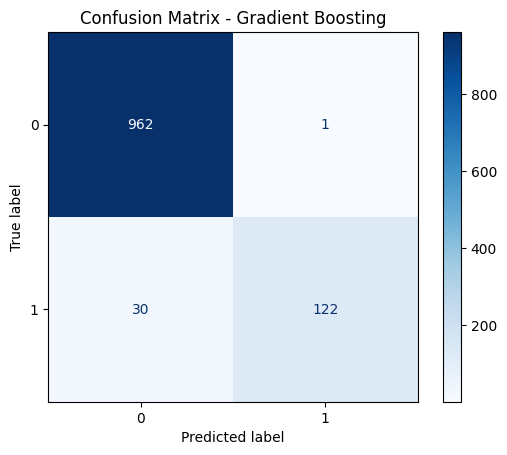


 MultinomialNB
Accuracy: 95.87 %
classification report - MultinomialNB               precision    recall  f1-score   support

           0       0.95      1.00      0.98       963
           1       1.00      0.70      0.82       152

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



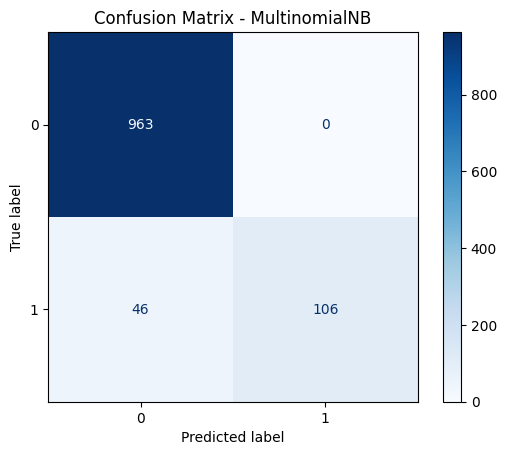


 BernoulliNB
Accuracy: 97.76 %
classification report - BernoulliNB               precision    recall  f1-score   support

           0       0.97      1.00      0.99       963
           1       1.00      0.84      0.91       152

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



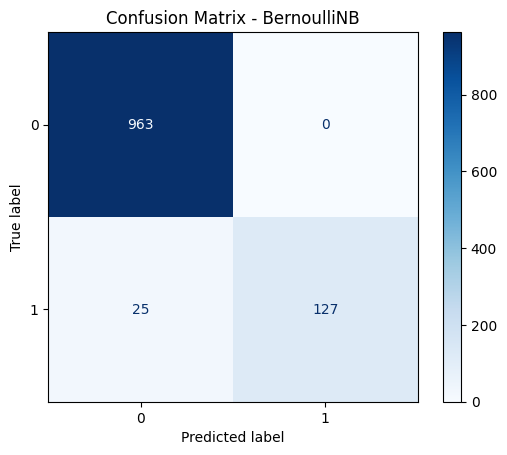

In [15]:



# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    accuracy_results[name] = round(acc * 100, 2)

    print(f"\n {name}")
    print("Accuracy:", round(acc * 100, 2), "%")

    cr=classification_report(y_test,preds)
    print(f'classification report - {name}',cr)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

In [16]:
print("\n📊 Model Accuracy Summary:")
for name, acc in accuracy_results.items():
    print(f"{name}: {acc}%")


📊 Model Accuracy Summary:
Logistic Regression: 97.22%
KNN: 90.76%
Decision Tree: 96.05%
XGBoost: 97.76%
LightGBM: 98.21%
AdaBoost: 94.8%
Gradient Boosting: 97.22%
MultinomialNB: 95.87%
BernoulliNB: 97.76%
